# US Housing/Rent Analysis: Zillow + ArcGIS API for Python)

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

# Set ArcGIS credentials, if applicable
#  Either replace these variables here if only running locally or
#  set in local .env file
ARCGIS_USERNAME = os.environ['ARCGIS_USERNAME'] # Username for acount
ARCGIS_PASSWORD = os.environ['ARCGIS_PASSWORD'] # Password for account
ARCGIS_APP_CLIENT_ID = os.environ['ARCGIS_APP_CLIENT_ID'] # Client ID for OAuth
ARCGIS_APP_CLIENT_SECRET = os.environ['ARCGIS_APP_CLIENT_SECRET'] # Client Secret for OAuth

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

After importing initial packages, we'll start by looking at ZORI (Zillow Observed Rent Index). See [this Zillow documentation](https://www.zillow.com/research/methodology-zori-repeat-rent-27092/) for the methodology behind this index. 

Note - Unless otherwise specified the property and market data files are downloaded from [Zillow Research](https://www.zillow.com/research/data/). 

In [4]:
zori_df = pd.read_csv('raw_data\Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')
zori_df.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,102001,United States,0,1318.0,1324,1329.0,1334,1340,1345,1351,...,1723,1741,1761,1782,1803,1824,1845.0,1867.0,1889,1911
1,394913,"New York, NY",1,4684.0,4705,4725.0,4746,4767,4787,4808,...,5214,5255,5310,5366,5421,5481,5541.0,5601.0,5664,5728
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1750.0,1761,1771.0,1782,1792,1803,1813,...,2423,2443,2468,2492,2516,2541,2566.0,2592.0,2618,2644
3,394463,"Chicago, IL",3,1405.0,1409,1413.0,1416,1420,1423,1427,...,1634,1644,1656,1668,1680,1692,1705.0,1717.0,1731,1744
4,394514,"Dallas-Fort Worth, TX",4,1128.0,1131,1135.0,1138,1142,1146,1149,...,1517,1536,1557,1578,1599,1621,1643.0,1665.0,1688,1710


In [5]:
zori_df.columns

Index(['RegionID', 'RegionName', 'SizeRank', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-

In [6]:
id_vars = list(zori_df.columns[:3])
value_vars = list(zori_df.columns)[3:]

The downloaded format is useful for other things, but for now let's melt our df so that each row is an observation, and each column a variable..

In [7]:
zori_df = pd.melt(zori_df, id_vars=id_vars, value_vars=value_vars, var_name='YearMonth', value_name='ZORI')
zori_df.head()

,RegionID,RegionName,SizeRank,YearMonth,ZORI
0,102001,United States,0,2014-01,1318.0
1,394913,"New York, NY",1,2014-01,4684.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1750.0
3,394463,"Chicago, IL",3,2014-01,1405.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1128.0


OK yup, 뭔가 되게 시원한 느낌이네 ^^

So now it's really easy to check filter, check different aggregation stats, etc.
e.g...

In [8]:
ny_dec2021 = zori_df.loc[(zori_df['RegionName'].str.contains('NY')) & (zori_df['YearMonth']=='2021-12')]
print(f"Dec 2021 mean ZORI for NY cities ({', '.join(ny_dec2021['RegionName'].unique())}):\n{ny_dec2021['ZORI'].mean()}")

Dec 2021 mean ZORI for NY cities (New York, NY, Buffalo, NY, Rochester, NY, Albany, NY, Syracuse, NY):
2184.4


In [9]:
print(f"btw, without NYC: {ny_dec2021.loc[ny_dec2021['RegionName'] != 'New York, NY']['ZORI'].mean()}")

btw, without NYC: 1298.5


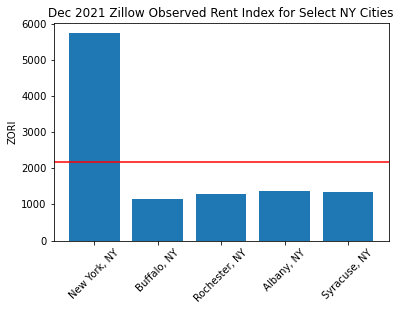

In [10]:
x = 'RegionName'
y = 'ZORI'
plt.bar(x=x, height=y, data=ny_dec2021)
plt.axhline(y=ny_dec2021[y].mean(), color='r', linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('ZORI')
plt.title('Dec 2021 Zillow Observed Rent Index for Select NY Cities')
plt.show()

## Bring in ArcGIS for geos

If using an ArcGIS Developer account and have (or can create) an application that uses OAuth 2.0 credentials to access ArcGIS services. This is needed to access certain content, such as the ZIP code boundaries layer below.

In [11]:
from arcgis import geometry
from arcgis.gis import GIS

In [12]:
# Authentication - Anonymous user
gis = GIS()
print(f'Logged in as anonymous user to {gis.properties.portalName}')

Logged in as anonymous user to ArcGIS Online


In [13]:
# Authentication - OAuth
# client_gis = GIS(client_id=ARCGIS_APP_CLIENT_ID)

In [14]:
# Authentication - Logging in as user
# my_gis = GIS(
#     username=ARCGIS_USERNAME,
#     password=ARCGIS_PASSWORD
# )
# print(f'Logged in as: {my_gis.properties.user.username}')

In [15]:
items = gis.content.search(
    query='United States ZIP Code Boundaries owner: esri_dm',
    item_type='Feature Layer',
    max_items=15)
from IPython.display import display

for item in items:
    display(item)

<Item title:"USA ZIP Code Areas" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2015)" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2014)" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2016)" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States County Boundaries 2018" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States State Boundaries 2018" type:Feature Layer Collection owner:esri_dm>

<Item title:"USA ZIP Codes (2013)" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Tract Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States State Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Tract Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States County Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Country Boundary 2020" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States ZIP Code Boundaries 2015" type:Feature Layer Collection owner:esri_dm>

<Item title:"United States Block Group Boundaries 2017" type:Feature Layer Collection owner:esri_dm>

In [16]:
# See https://developers.arcgis.com/documentation/mapping-apis-and-services/security/application-credentials/
import requests

client_credentials = {
    'client_id': ARCGIS_APP_CLIENT_ID, # Set at top of notebook
    'client_secret': ARCGIS_APP_CLIENT_SECRET, # Set at top of notebook
    'grant_type': 'client_credentials'
}

def get_token():
    params = client_credentials
    request = requests.get('https://www.arcgis.com/sharing/rest/oauth2/token',
                          params=params)
    response = request.json()
    token = response['access_token']
    return token
token = get_token()

In [17]:
# print(token)

In [18]:
# zip_gis = GIS(
#     'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Boundaries_2020/FeatureServer', 
#     client_id=ARCGIS_APP_CLIENT_ID,
#     token=token)

In [19]:
import pprint

url = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Boundaries_2020/FeatureServer'
params = {
    'f': 'json',
    'token': token
}
data = requests.get(url, params=params)
print(data)
# pprint.pprint(data.json())

<Response [200]>


In [20]:
map=gis.map((39.5,98.35))
map

MapView(layout=Layout(height='400px', width='100%'))

We'll see to AL and HI in a bit, sorrrryyy guys

In [21]:
# USA ZIP Code Areas
usa_zip_areas = items[0]

In [22]:
from arcgis.features import FeatureLayer
us_zips_fl = FeatureLayer(usa_zip_areas.url + '/0')

In [23]:
us_zips_fl

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_ZIP_Code_Areas_anaylsis/FeatureServer/0">

In [24]:
map.add_layer(usa_zip_areas)

In [25]:
map.center = (43, -75)
map.zoom = 6

In [26]:
# items = gis.content.search(
#     query='NY State Boundaries',
#     item_type='Feature Layer',
#     max_items=15)

# for item in items:
#     display(item)

In [27]:
# https://services.arcgis.com/cJ9YHowT8TU7DUyn/arcgis/rest/services/New_York_State_Boundary/FeatureServer/0
items = gis.content.search(
    query='NY State Boundary owner: R2webteam',
    item_type='Feature Layer',
    max_items=1)

for item in items:
    display(item)

<Item title:"NY State Boundary" type:Feature Layer Collection owner:R2webteam>

In [28]:
ny_boundary = items[0]
ny_boundary.type

'Feature Service'

## Working with Pandas + NY State Boundary Feature Layer

In [29]:
import pandas as pd

In [30]:
ny_fl = FeatureLayer(
    'https://services.arcgis.com/cJ9YHowT8TU7DUyn/arcgis/rest/services/New_York_State_Boundary/FeatureServer/0')

In [31]:
ny_df = pd.DataFrame.spatial.from_layer(ny_fl)
ny_df.head()

,FID,OBJECTID_1,OBJECTID,STATE,COUNT_,FIRST_STAT,AREA,LEN,AREA_1,LEN_1,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,SHAPE
0,1,1,2,36,15079,36,0,0,0,0,141298299821,2.364094e+06,141298299821,2.364094e+06,2.637731e+11,3.210689e+06,"{""rings"": [[[-8329656.99312163, 5624018.496792..."


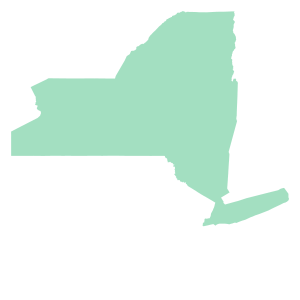

In [32]:
display(ny_df.spatial)

In [33]:
poly1 = ny_df.iloc[0].SHAPE
type(poly1)

arcgis.geometry._types.Polygon

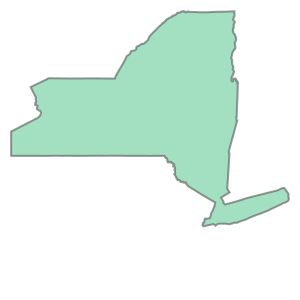

In [34]:
display(poly1)

In [35]:
ny_boundary.keys()

dict_keys(['id', 'owner', 'created', 'modified', 'guid', 'name', 'title', 'type', 'typeKeywords', 'description', 'tags', 'snippet', 'thumbnail', 'documentation', 'extent', 'categories', 'spatialReference', 'accessInformation', 'licenseInfo', 'culture', 'properties', 'advancedSettings', 'url', 'proxyFilter', 'access', 'subInfo', 'appCategories', 'industries', 'languages', 'largeThumbnail', 'banner', 'screenshots', 'listed', 'numComments', 'numRatings', 'avgRating', 'numViews', 'scoreCompleteness', 'groupDesignations', 'layers', 'tables'])

<class 'arcgis.geometry._types.Polygon'>


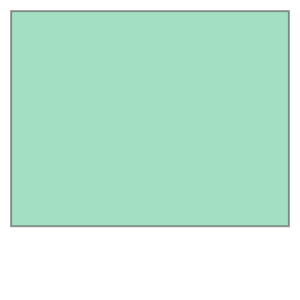

In [36]:
print(type(ny_df.spatial.bbox))
display(ny_df.spatial.bbox)

In [37]:
map.draw(ny_df.iloc[0].SHAPE, 
            symbol={
                      "type": "esriSFS",
                      "style": "esriSFSSolid",
                      "color": [115,76,0,255],
                        "outline": {
                         "type": "esriSLS",
                         "style": "esriSLSSolid",
                         "color": [110,110,110,255],
                         "width": 1}
                    })
map.draw(ny_df.spatial.bbox)

In [38]:
ny_df.head()

,FID,OBJECTID_1,OBJECTID,STATE,COUNT_,FIRST_STAT,AREA,LEN,AREA_1,LEN_1,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape__Area,Shape__Length,SHAPE
0,1,1,2,36,15079,36,0,0,0,0,141298299821,2.364094e+06,141298299821,2.364094e+06,2.637731e+11,3.210689e+06,"{""rings"": [[[-8329656.99312163, 5624018.496792..."


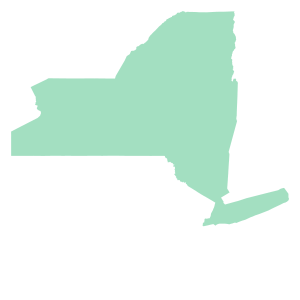

In [39]:
ny_df.spatial

In [40]:
from arcgis.geometry.filters import intersects

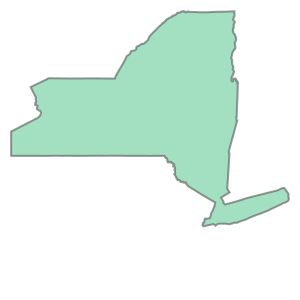

In [41]:
ny_df.iloc[0].SHAPE

In [42]:
type(ny_df.iloc[0].SHAPE)

arcgis.geometry._types.Polygon

In [43]:
type(ny_df)

pandas.core.frame.DataFrame

In [44]:
ny_df.iloc[0].SHAPE.spatialReference

{'wkid': 102100, 'latestWkid': 3857}

In [45]:
ny_filter = intersects(ny_df.iloc[0].SHAPE, sr=ny_df.iloc[0].SHAPE.spatialReference)
ny_filter.keys()

dict_keys(['geometry', 'geometryType', 'spatialRel', 'inSR'])

In [46]:
ny_filter['spatialRel']

'esriSpatialRelIntersects'

In [47]:
ny_filter

{'geometry': {'rings': [[[-8329656.99312163, 5624018.4967922],
    [-8328612.26573529, 5623367.36859596],
    [-8328174.77178216, 5623655.52525431],
    [-8326879.01704367, 5623816.9350126],
    [-8326685.32148684, 5623208.33320077],
    [-8326157.66807584, 5622535.21844226],
    [-8325935.57838837, 5622254.17519544],
    [-8325113.49079686, 5622278.57572333],
    [-8324819.6027061, 5622286.45292179],
    [-8322623.26933745, 5622407.69128463],
    [-8322437.36133511, 5621530.75429609],
    [-8322333.84354387, 5620968.7541853],
    [-8322269.27398655, 5620727.11843948],
    [-8321931.97261579, 5620590.16024812],
    [-8321322.49616999, 5620341.45474313],
    [-8321090.39440939, 5620257.2465807],
    [-8320535.47574019, 5620039.24252916],
    [-8319987.78107376, 5620030.57719811],
    [-8319050.46899785, 5620014.84243507],
    [-8318486.08494255, 5620713.7315161],
    [-8318079.20083194, 5621217.48186329],
    [-8317182.5216048, 5621530.76704747],
    [-8315791.02948333, 5622045.56909086

In [48]:
# from arcgis import GeoAccessor, GeoSeriesAccessor

In [49]:
us_zips_fl

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_ZIP_Code_Areas_anaylsis/FeatureServer/0">

In [50]:
# ny_zips_sedf = us_zips_fl.query(geometry_filter=ny_filter, as_df=True).reset_index(drop=True)

In [51]:
# print(ny_zips_sedf.shape)
# ny_zips_sedf.head()

In [52]:
path = './local_intermediates'
table_path = path + '/ny_state_filtered_zips_spatial.csv'
shp_path = path + '/ny_state_filtered_zips.shp'

In [53]:
# So we don't have to query the feature layer every time..
if not os.path.exists(path):
    os.makedirs(path)
# ny_zips_sedf.spatial.to_table(table_loc);
# ny_zips_sedf.spatial.to_featureclass(location=shp_path);

In [54]:
# from geopandas import read_file

# ny_zips_gdf = read_file(shp_path)

In [55]:
# print(ny_zips_gdf.shape)
# ny_zips_gdf.head()

In [56]:
# type(ny_zips_gdf.geometry)

In [57]:
# NameError: name '_HASSHAPELY' is not defined, in arcgis\geometry\types.py when trying to call from_shapely. 
#  It's not that it's False (I do have shapely in this environment), it's that this class attribute is still None, 
#  whereas it should be set via try-except blocks trying to lazy load shapely (after arcpy) in _check_geometry_engine

# from arcgis import GeoAccessor
# ny_zips_sedf = GeoAccessor.from_geodataframe(ny_zips_gdf, column_name='geometry')
# OR
# ny_zips_sedf = pd.DataFrame.spatial.from_geodataframe(ny_zips_gdf, column_name='geometry')

In [58]:
# So we don't have to query the feature layer every time..
ny_zips_df = pd.DataFrame.spatial.from_featureclass(location=shp_path)
ny_zips_df.drop(['index'], axis=1, inplace=True)
print(ny_zips_df.shape)
ny_zips_df.head()

(1794, 10)


,OBJECTID,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape__Are,Shape__Len,SHAPE
0,0,01201,Pittsfield,MA,45914.0,622.73,73.73,3.510323e+08,103213.138119,"{""rings"": [[[-8170483.38122615, 5219564.392654..."
1,1,01230,Great Barrington,MA,8943.0,90.30,99.04,4.674354e+08,192135.837226,"{""rings"": [[[-8180119.19634921, 5184205.021989..."
2,2,01254,Richmond,MA,936.0,78.07,11.99,5.693320e+07,41223.233947,"{""rings"": [[[[-8172062.22556407, 5213798.46529..."
3,3,01258,South Egremont,MA,173.0,6.33,27.33,1.286876e+08,62391.499851,"{""rings"": [[[-8182889.04791913, 5173909.244455..."
4,4,01266,West Stockbridge,MA,1531.0,51.93,29.48,1.396710e+08,79134.396585,"{""rings"": [[[-8176441.61225553, 5197721.478854..."


In [59]:
ny_zips_df.STATE.unique()

array(['MA', 'VT', 'CT', 'NY', 'NJ', 'PA'], dtype=object)

So obviously there appears to be overlap between the geometry for NY and zip codes of bordering states. We can filter by state of course here, assuming we make the zip codes dataset our go-to source of truth

In [60]:
ny_zips_df.STATE.value_counts()

NY    1701
PA      29
VT      24
NJ      20
CT      15
MA       5
Name: STATE, dtype: int64

In [63]:
# ny_zips_sedf.spatial.plot(map_widget=map)

Looking at the newly filtered map of zip codes, we can see that the zips from bordering states are indeed right on the border with NY, and have remained in our dataset simply because the two datasets ar not perfectly aligned. The point being we can safely take the zip codes to be our source of truth and filter to NY zips only

In [64]:
# ny_zips_sedf = ny_zips_sedf.loc[ny_zips_df.STATE == 'NY']
# ny_zips_sedf.shape
ny_zips_df = ny_zips_df.loc[ny_zips_df.STATE == 'NY']
ny_zips_df.shape

(1701, 10)

In [65]:
# ny_zips_sedf.spatial.plot(map_widget=map)

In [74]:
ny_zips_df.reset_index(drop=True, inplace=True)

In [75]:
ny_zips_df.head()

,OBJECTID,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape__Are,Shape__Len,SHAPE
0,32,06390,Fishers Island,NY,234.0,55.85,4.19,1.922412e+07,55859.840957,"{""rings"": [[[[-8019294.48084679, 5049295.57033..."
1,65,10001,New York,NY,30787.0,47364.62,0.65,2.917800e+06,8985.405967,"{""rings"": [[[-8238831.02162078, 4975689.125056..."
2,66,10002,New York,NY,81262.0,71282.46,1.14,5.149311e+06,10616.519033,"{""rings"": [[[-8237373.97193774, 4970256.479755..."
3,67,10003,New York,NY,55510.0,99125.00,0.56,2.528808e+06,7663.840387,"{""rings"": [[[-8237303.81839464, 4972807.275463..."
4,68,10004,New York,NY,5357.0,10301.92,0.52,2.345764e+06,15734.367594,"{""rings"": [[[[-8242902.16464222, 4966843.50460..."


In [78]:
zori_df.head()

,RegionID,RegionName,SizeRank,YearMonth,ZORI
0,102001,United States,0,2014-01,1318.0
1,394913,"New York, NY",1,2014-01,4684.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2014-01,1750.0
3,394463,"Chicago, IL",3,2014-01,1405.0
4,394514,"Dallas-Fort Worth, TX",4,2014-01,1128.0


In [79]:
ny_dec2021

,RegionID,RegionName,SizeRank,YearMonth,ZORI
9691,394913,"New York, NY",1,2021-12,5728.0
9737,394425,"Buffalo, NY",47,2021-12,1158.0
9741,395031,"Rochester, NY",51,2021-12,1302.0
9750,394308,"Albany, NY",60,2021-12,1381.0
9769,395143,"Syracuse, NY",79,2021-12,1353.0


In [81]:
from arcgis import geocode

In [89]:
regions_xy = ny_dec2021['RegionName'].apply(lambda x: geocode(x)[0]['location'])
regions_xy

9691    {'x': -74.00713999999994, 'y': 40.71455000000003}
9737    {'x': -78.87845999999996, 'y': 42.885440000000...
9741    {'x': -77.61631999999997, 'y': 43.155800000000...
9750    {'x': -73.75520999999998, 'y': 42.65155000000004}
9769    {'x': -76.14737999999994, 'y': 43.05042000000003}
Name: RegionName, dtype: object

In [90]:
from arcgis.geometry import Point

In [91]:
for r in regions_xy:
    pt = Point({
        'x': r['x'],
        'y': r['y'],
        'spatialReference': {'wkid': 4326}
    })
    pt_sym = {
        'type': 'esriSMS',
        'style': 'esriSMSCircle',
        'color': [0,0,0,255],        
        'size': 12,
        'angle': 0,
        'xoffset': 0,
        'yoffset': 0,
        'outline': {
            'color': [0,0,0,255],
            'width': 1}
    }
    map.draw(pt, symbol=pt_sym)

## A look at the ZHVI

In [12]:
import pandas as pd

zhvi_df = pd.read_csv('raw_data\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
print(zhvi_df.shape)
zhvi_df.head()

(907, 270)


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,127215.0,127559.0,127921.0,128658.0,129402.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,394913,1,"New York, NY",Msa,NY,223454.0,224790.0,225991.0,228356.0,230557.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231141.0,231946.0,233179.0,235523.0,238036.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,394463,3,"Chicago, IL",Msa,IL,169006.0,169405.0,169921.0,170954.0,172049.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130305.0,130410.0,130496.0,130708.0,130930.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0


In [13]:
zhvi_df['RegionType'].value_counts()

Msa        906
Country      1
Name: RegionType, dtype: int64

Similar structure to ZORI, but we're looking at "typical home value" in this case.

In [14]:
id_vars = list(zhvi_df.columns[:5])
value_vars = list(zhvi_df.columns)[5:]
zhvi_df = pd.melt(zhvi_df, id_vars=id_vars, value_vars=value_vars, var_name='Date', value_name='ZHVI')
zhvi_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,ZHVI
0,102001,0,United States,Country,NaN,2000-01-31,127215.0
1,394913,1,"New York, NY",Msa,NY,2000-01-31,223454.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2000-01-31,231141.0
3,394463,3,"Chicago, IL",Msa,IL,2000-01-31,169006.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2000-01-31,130305.0


## A look at Inventory

In [5]:
invt_df = pd.read_csv('raw_data\Metro_invt_fs_uc_sfrcondo_sm_month.csv')
print(invt_df.shape)
invt_df.head()

(917, 54)


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,1427002.0,1384427.0,1441573.0,1528714.0,1630501.0,...,963030.0,999682.0,1030744.0,1077101.0,1123625.0,1143009.0,1134204.0,1070817.0,957555.0,832996.0
1,394913,1,"New York, NY",Msa,NY,68876.0,68438.0,72943.0,79866.0,85879.0,...,59106.0,61210.0,63615.0,65126.0,65337.0,63725.0,61993.0,58413.0,52337.0,44938.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,20039.0,19877.0,21839.0,23762.0,25728.0,...,20263.0,20696.0,20772.0,21322.0,21734.0,21517.0,20569.0,18730.0,15975.0,13703.0
3,394463,3,"Chicago, IL",Msa,IL,42660.0,40986.0,44585.0,49107.0,53623.0,...,33414.0,35871.0,37975.0,39969.0,41418.0,41561.0,40602.0,37487.0,32480.0,27150.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,24276.0,23200.0,24343.0,26748.0,29538.0,...,22150.0,23236.0,24025.0,25198.0,26335.0,26732.0,26131.0,24616.0,22216.0,19465.0


Note we have a much shorter time range for this one

In [15]:
id_vars = list(invt_df.columns[:5])
value_vars = list(invt_df.columns)[5:]
invt_df = pd.melt(invt_df, id_vars=id_vars, value_vars=value_vars, var_name='Date', value_name='Inventory')
invt_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Inventory
0,102001,0,United States,Country,NaN,2018-01-31,1427002.0
1,394913,1,"New York, NY",Msa,NY,2018-01-31,68876.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2018-01-31,20039.0
3,394463,3,"Chicago, IL",Msa,IL,2018-01-31,42660.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2018-01-31,24276.0
